In [29]:
%load_ext autoreload
%autoreload 2
%pylab
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [63]:
import csv
from collections import defaultdict
import json 
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from play_scraper import api
from play_scraper import googleplaystore
import time

In [44]:
top_paid = pd.read_csv('/Users/bettychou1993/Desktop/intern@sdl/play-scraper/data/top_paid.csv')

In [38]:
top_paid.head()

,Unnamed: 0,title,category,installs,score,description,reviews
0,afh.calculator,Air Force PT Test Calculator,HEALTH_AND_FITNESS,"5,000+",4.3,UPDATE: Version 2.0 supports Android Wear watc...,[]
1,agraetz.sunrisealarmp,Sunrise Alarm for LIFX & Hue,HEALTH_AND_FITNESS,"1,000+",4.4,Don't you hate having to set a seperate alarm ...,[]
2,alexcrusher.just6weeks.full,Just 6 Weeks,HEALTH_AND_FITNESS,"100,000+",4.7,Just 6 Weeks offers you a unique opportunity t...,"[{""rating"": ""20"", ""review-text"": "" The app ha..."
3,co.nowvr.relaxationvr,Relax VR,HEALTH_AND_FITNESS,"10,000+",3.6,** NOT compatible with Daydream. Please see ot...,"[{""rating"": ""20"", ""review-text"": "" NOT DAYDRE..."
4,com.Aromascense.app,Aromascense,HEALTH_AND_FITNESS,50+,5.0,Aromascense combines a reference guide for usi...,[]


In [45]:
top_paid = top_paid[['installs', 'score']]

In [104]:
top_paid['bins'] = pd.cut(top_paid['score'],bins=[0,3.0,3.5,4.0,4.5,5.0], labels=["0-3.0","3.0-3.5","3.5-4.0","4.0-4.5", "4.5-5.0"])

In [106]:
top_paid.head()

,installs,score,bins
0,5k+,4.3,4.0-4.5
1,1k+,4.4,4.0-4.5
2,100k+,4.7,4.5-5.0
3,10k+,3.6,3.5-4.0
4,<1k,5.0,4.5-5.0


In [117]:
b = top_paid.groupby('bins').count()['score']

In [46]:
# replace multiple values with one value, pass dictionary into df.replace
x = dict.fromkeys(['5+', '10+', '50+', '100+', '500+'], '<1k')
top_paid['installs'] = top_paid['installs'].replace(x)

In [47]:
top_paid['installs'] = top_paid['installs'].map({'<1k': '<1k',
                                                 '1,000+': '1k+', 
                                                '5,000+': '5k+',
                                                '10,000+': '10k+',
                                                '50,000+': '50k+',
                                                '100,000+': '100k+',
                                                '500,000+': '500k+',
                                                '1,000,000+': '1,000k+'})

In [53]:
top_paid_installs = top_paid['installs']

In [57]:
top_paid_installs

0        5k+
1        1k+
2      100k+
3       10k+
4        <1k
5       50k+
6       50k+
7       50k+
8      100k+
9        1k+
10      50k+
11       1k+
12       5k+
13       5k+
14      10k+
15       5k+
16       <1k
17      10k+
18      50k+
19       5k+
20       1k+
21       <1k
22       5k+
23       1k+
24       1k+
25      10k+
26      50k+
27       1k+
28       1k+
29       1k+
       ...  
90       5k+
91      10k+
92     100k+
93       1k+
94      50k+
95      10k+
96      50k+
97       5k+
98      10k+
99     100k+
100      5k+
101      1k+
102    100k+
103     10k+
104     50k+
105      1k+
106    100k+
107     10k+
108    100k+
109     10k+
110     10k+
111      1k+
112      1k+
113    100k+
114     10k+
115    500k+
116      <1k
117     10k+
118      1k+
119     10k+
Name: installs, Length: 120, dtype: object

In [59]:
a = top_paid.groupby('installs').count()

In [70]:
a

,score
installs,
"1,000k+",1
100k+,14
10k+,33
1k+,30
500k+,1
50k+,13
5k+,18
<1k,9


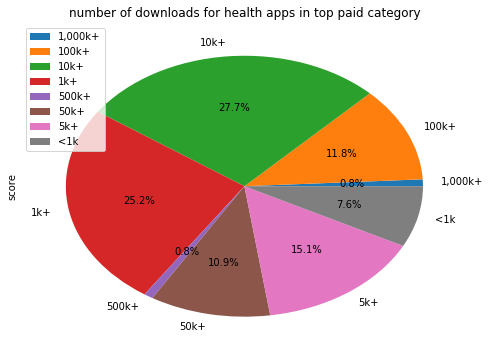

In [110]:
fig = a.plot.pie(subplots=True, autopct='%1.1f%%', figsize=(8, 6), legend=False)
plt.title('number of downloads for health apps in top paid category')
plt.legend(loc=2)

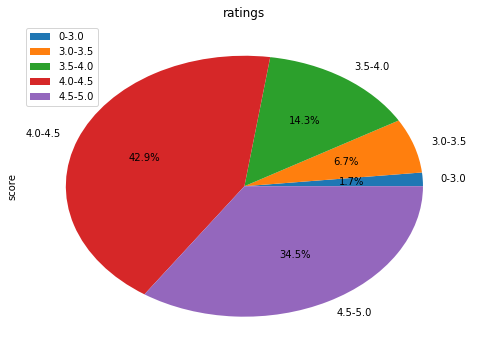

In [118]:
b.plot.pie(subplots=True, autopct='%1.1f%%', figsize=(8, 6), legend=False)
plt.title('ratings')
plt.legend(loc=2)